Null and alternative hypotheses are used in statistical hypothesis testing. The null hypothesis of a test always predicts no effect or no relationship between variables, while the alternative hypothesis states your research prediction of an effect or relationship.

For Example, Null Hypothesis: On the average, the dosage sold under this brand is 50 mg (population mean dosage = 50 mg). Alternative Hypothesis: On the average, the dosage sold under this brand is not 50 mg (population mean dosage ≠ 50 mg). This is a two-sided alternative hypothesis.

In [143]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
import seaborn as sns

# Import the necessary libraries first
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest, RFE
from sklearn.linear_model import LassoCV, LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, jaccard_score, log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split


In [144]:
df = pd.read_csv('/content/day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [145]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [146]:
f'duplicates that are presented: {df.duplicated().sum()}'

'duplicates that are presented: 0'

In [147]:
df.isnull().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64, None)

In [148]:
flag = 0
for catogery in df.columns[1:]:
  if len(df[catogery].unique())<20:
    if flag == 0:
      print('Categorical varviables: ')
      print('')
      flag = 1
    print('\t'+ str(catogery) + " : " + str(df[catogery].unique()))


flag1 = 0
for catogery in df.columns[1:]:
  if len(df[catogery].unique())>=20:
    if flag1 == 0:
      print('')
      print('')

      print('Numerical (continous) varviables: ')
      print('')
      flag1 = 1
    print('\t' + catogery)
    

Categorical varviables: 

	season : [1 2 3 4]
	yr : [0 1]
	mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
	holiday : [0 1]
	weekday : [1 2 3 4 5 6 0]
	workingday : [1 0]
	weathersit : [2 1 3]


Numerical (continous) varviables: 

	dteday
	temp
	atemp
	hum
	windspeed
	casual
	registered
	cnt


In [149]:
drop_list = ['instant','dteday']
df = df.drop(drop_list, axis=1)

In [150]:
len(df.columns)

14

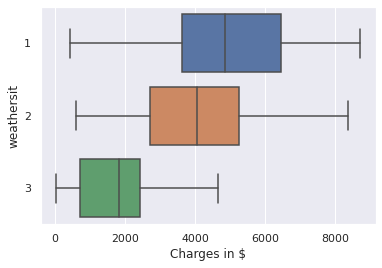

In [151]:
import seaborn as sns
sns.boxplot(y='weathersit',x='cnt',data=df,orient='h')
plt.xlabel("Charges in $")
plt.show()

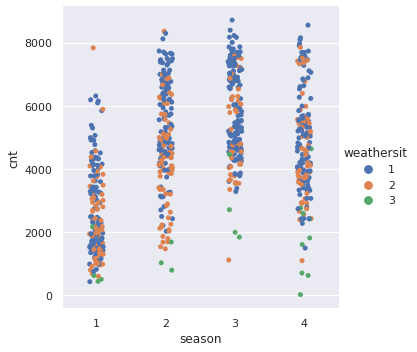

In [152]:
sns.catplot(x="season", y="cnt",hue="weathersit", data=df)


In [153]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

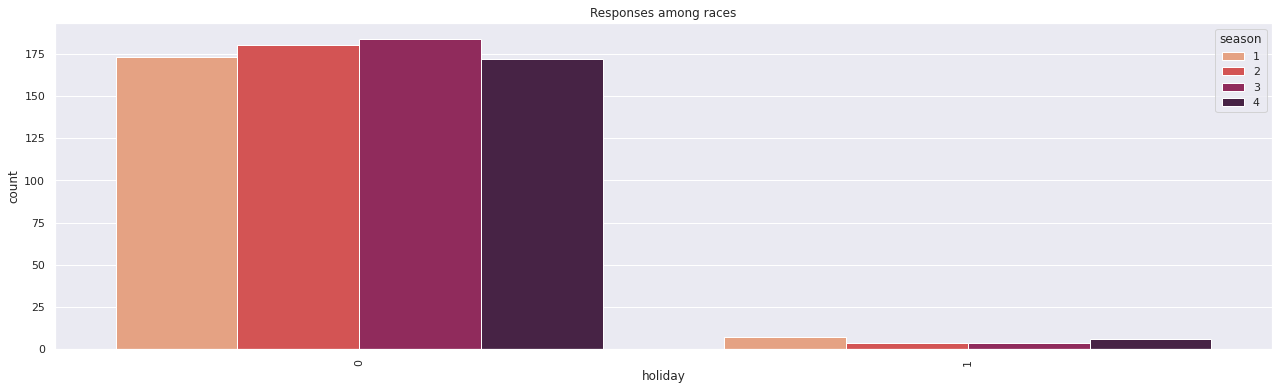

In [154]:
sns.set(rc={'figure.figsize':(48,6)})
plt.subplot(1,2,2)
plt.xticks(rotation=90)

sns.countplot(df['holiday'], hue = df['season'],palette="rocket_r")
plt.title("Responses among races")
plt.show()


In [155]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

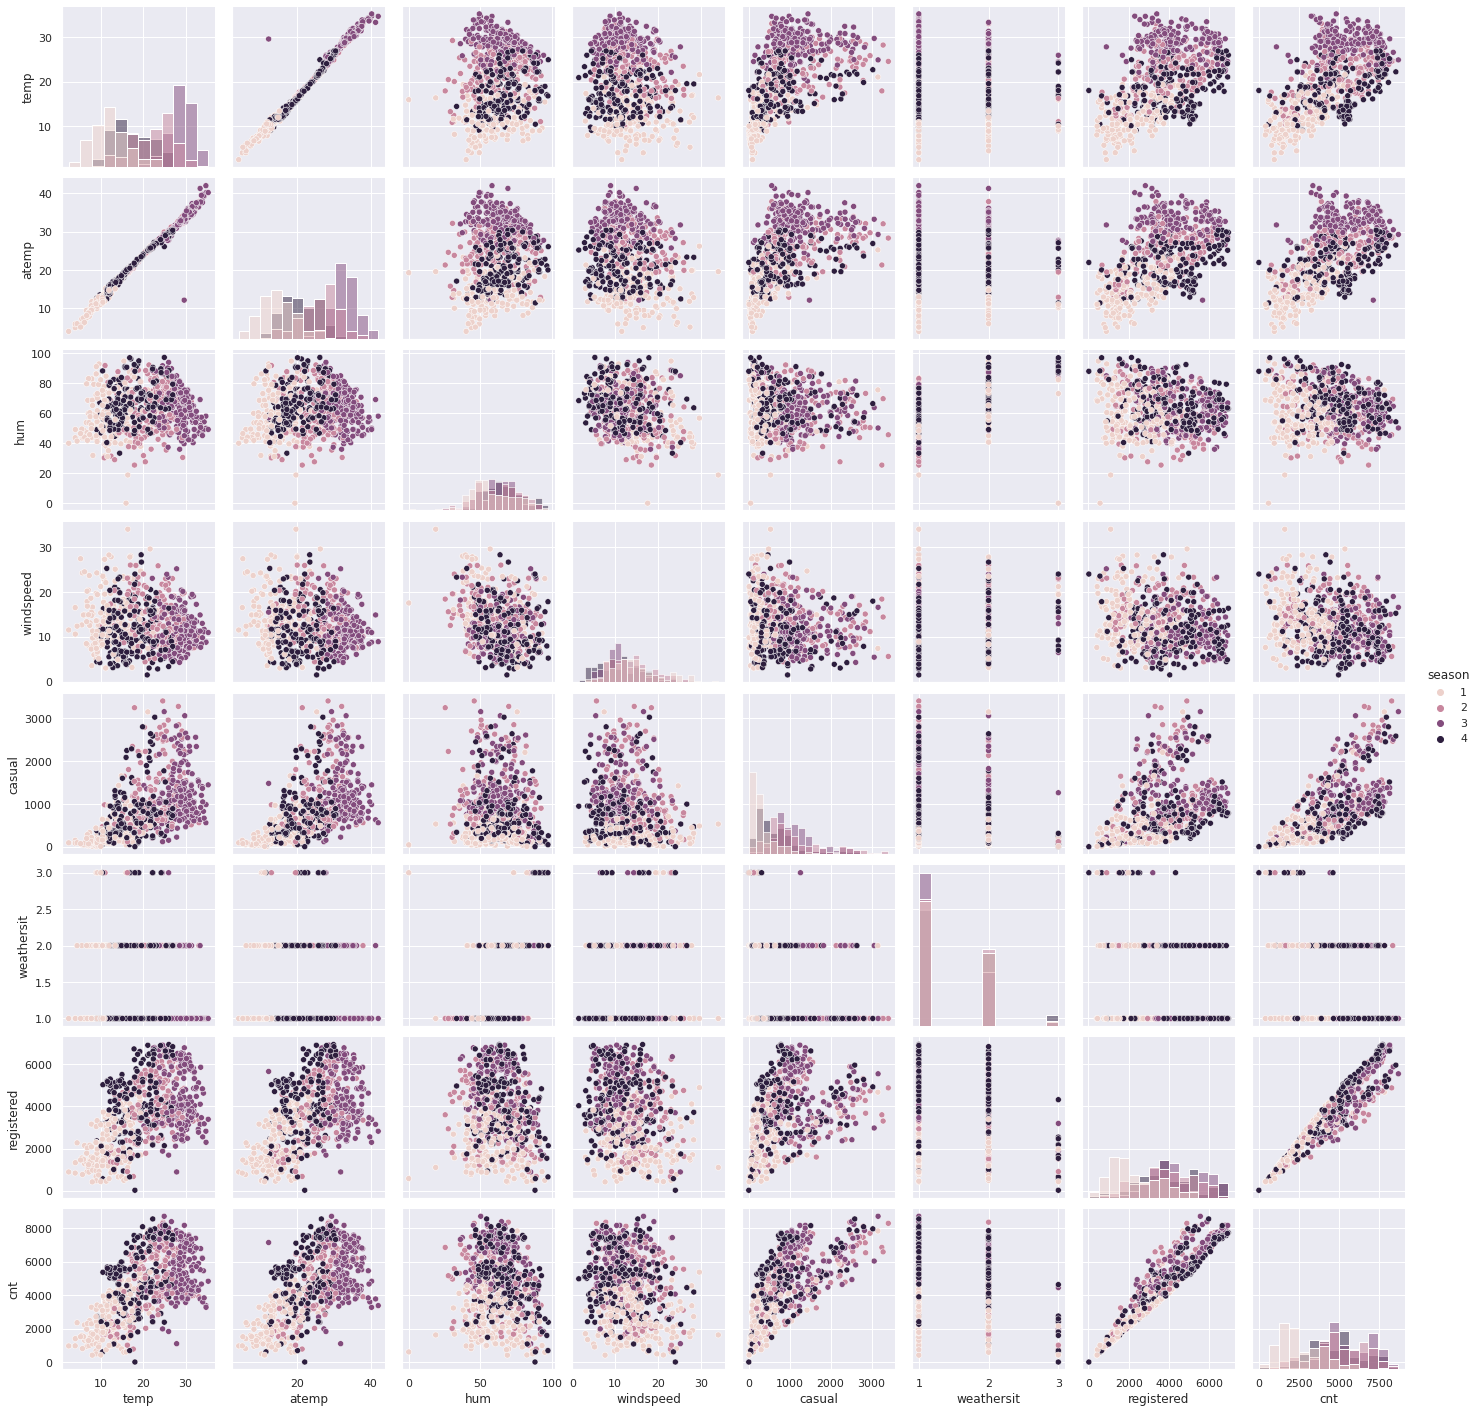

In [156]:
sns.pairplot(df[['temp','atemp', 'hum', 'windspeed','casual','season','weathersit', 'registered','cnt']], hue='season', diag_kind="hist")
plt.show()

#### Inferences

 - temp and atemp shows a exact linear relationship in between them and has a linear relationship with the target variable. Further, we'll keep one of these for further analysis.
 
 - casual and registered shows a linear realtionship with target variable cnt as sum of casual and registered booking is equal to the target variable cnt. Further, we'll drop both these variables to make our model unbiased.
    
 - windspeed and hum shows a very low negative linear relationship with target variable cnt. 

### Visualising categorical variable w.r.t target variable "cnt" via boxplot

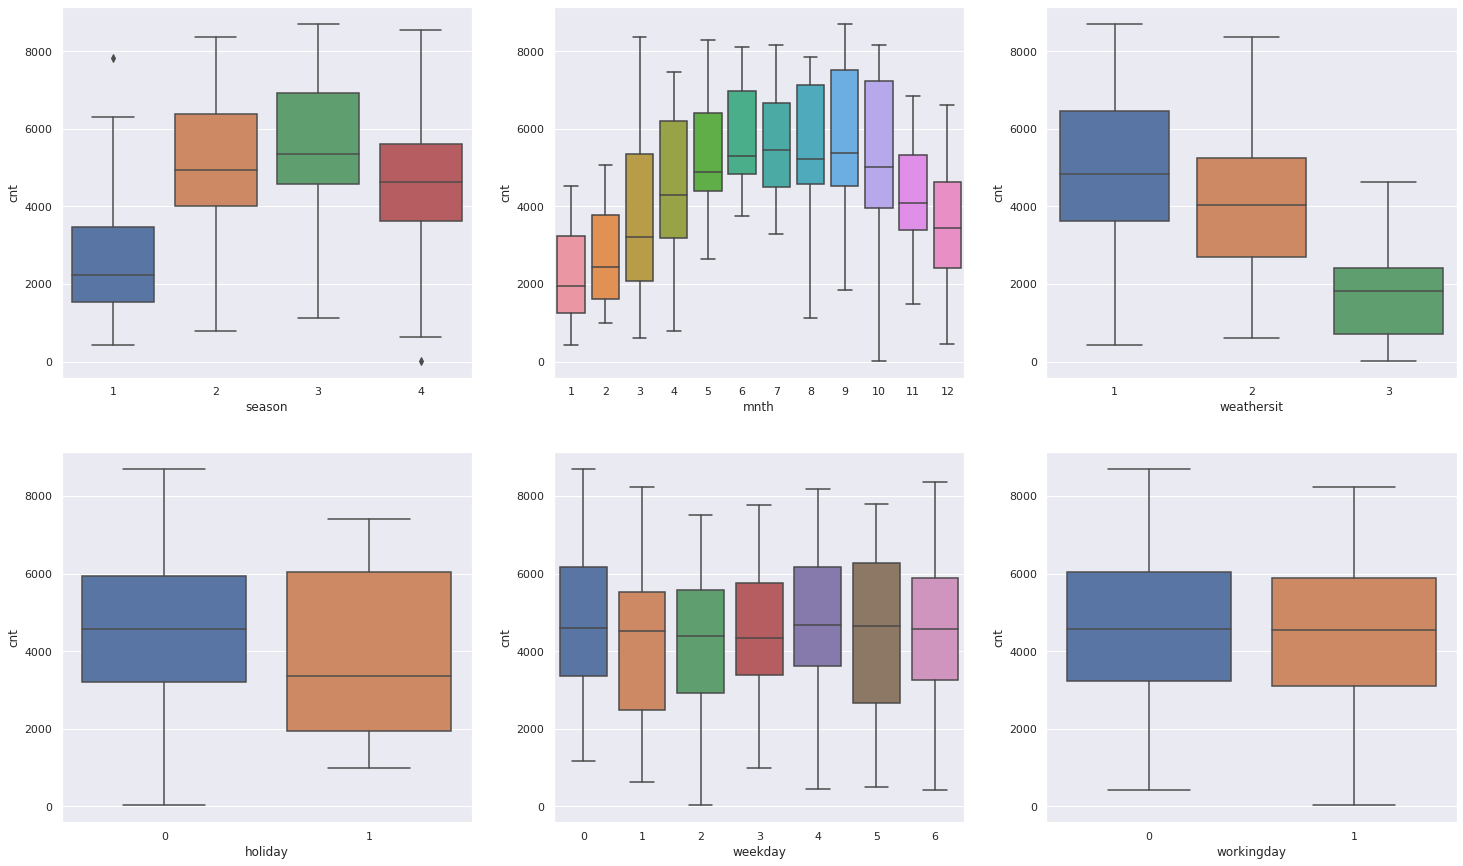

In [157]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

#### Inferences
There are 6 categorical variables in the dataset.

 - season: Almost 32% of the bike booking were happening in faal season with a median of approox 5000 booking. This was followed by Summer & Winter with 27% & 25% of total booking. Season can be a good predictor for the target variable.

 - mnth: Almost 10% of the bike booking were happening in the between May to September with a median of over 4000 booking per month. Mnth has some trend for bookings and can be a good predictor for the target variable.
    
 - weathersit: Almost 65% of the bike booking happened during Clear weather situation with a median of close to 5000 booking. This was followed by Misty+Cloudy weather situation with 30% of total booking. Weathersit does show some interesting trend towards the bike bookings can be a good predictor for the target variable.
    
 - holiday: Almost 97.6% of the bike booking were happening when it is not a holiday .Holiday may not be a good predictor for the target variable.
    
 - weekday: weekday variable shows very close trend (between 13% to 15% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the target variable which shall be decided further.
    
 - workingday: Almost 70% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking. workingday is an important variable but might have high correaltion with other independent variables which shall be analysed further  

### Visualising the correaltion between the variables via heatmap

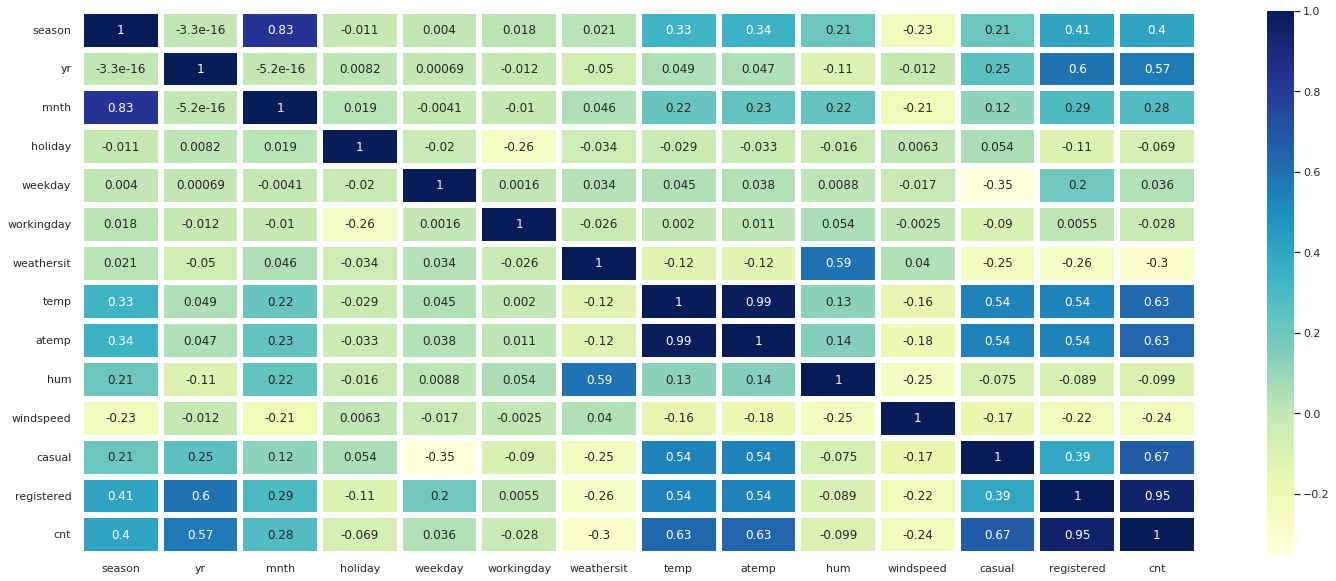

In [158]:
sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(df.corr(),linewidths=5, annot=True,cmap='YlGnBu')

#### Inferences
 - Variables "casual" and "registered" are highly correlated with our target variable "cnt". The realtionship between them is CNT = Casual + Registered . Hence, dropping the casual and registered variable.
 
 - Also, the variable "temp" and "atemp" also show a very high correlation, but we'll decide which feature should be kept further in analysis via RFE and VIF

In [159]:
df = df.drop(["casual","registered"], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Preperation II

In [160]:
# df = pd.get_dummies(df, columns=["season","yr","mnth", "holiday", "weekday", "workingday", "weathersit"], drop_first=True)


### Diving dataset into test and train

In [161]:
X = df.drop(['cnt'], axis=1)
y = df.pop('cnt')

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [163]:
# num_vars = ['temp','atemp','hum','windspeed','cnt']
X[:] = scaler.fit_transform(X[:])
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.0,0.0,0.0,0.0,0.166667,1.0,0.5,0.355170,0.373517,0.828620,0.284606
1,0.0,0.0,0.0,0.0,0.333333,1.0,0.5,0.379232,0.360541,0.715771,0.466215
2,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.171000,0.144830,0.449638,0.465740
3,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.175530,0.174649,0.607131,0.284297
4,0.0,0.0,0.0,0.0,0.833333,1.0,0.0,0.209120,0.197158,0.449313,0.339143


In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 143)

# Data Modelling and Evaluation

# feature selection

In [165]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Selecting the variables via RFE

# 2. Recursive Feature elimination 

It is a Wrapper Method 

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

### <font color='green'>fit.ranking_</font> tells which features are selected:-
The features that are selected are given Rank=1

Rank=2 and rank=3 corresponds that if we have choose <font color='red'>n_features_to_select</font>=4 our second choice would have been selected

In [166]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

In [172]:
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('atemp', True, 1),
 ('holiday', False, 4),
 ('hum', True, 1),
 ('mnth', False, 5),
 ('season', False, 2),
 ('temp', True, 1),
 ('weathersit', False, 3),
 ('weekday', False, 7),
 ('windspeed', True, 1),
 ('workingday', False, 6),
 ('yr', True, 1)]

Creating a dataframe with the columns selected via RFE

In [251]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [252]:
X_train.columns[~rfe.support_]

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [176]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,temp,atemp,hum,windspeed
19,0.0,0.252371,0.230998,0.553556,0.357705
98,0.0,0.353092,0.344513,0.902314,0.228196
354,0.0,0.460045,0.458041,0.882605,0.410266
433,1.0,0.284560,0.260817,0.360326,0.419234
521,1.0,0.616840,0.608042,0.628535,0.112836


In [253]:
X_train_rfe.describe()

,const,yr,temp,atemp,hum,windspeed
count,584.0,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.0,0.510274,0.544357,0.519040,0.642542,0.346404
std,0.0,0.500323,0.228780,0.215009,0.147157,0.161483
min,1.0,0.000000,0.046591,0.025950,0.000000,0.041051
25%,1.0,0.000000,0.346343,0.339738,0.530313,0.229511
50%,1.0,1.000000,0.555146,0.540924,0.642674,0.327568
75%,1.0,1.000000,0.740406,0.692377,0.748286,0.434616
max,1.0,1.000000,1.000000,0.980934,1.000000,1.000000


## 1. CHI-Squared Test (Goodness of Fit)

If you want to learn it click [here](https://www.youtube.com/watch?v=2QeDRsxSF9M&t=128s)

1. This statistical test is only applied for Non-Negative features.

2. It is a filter method means this technique dosen't needs **ML algorithm** to select features.


### SKLEARN comes in :)

The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical

tests to select a specific number of features, in this case, it is **Chi-Squared**.

In [177]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [189]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=5) # we want to select top 4 features
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[191.619 353.    136.544 656.857 157.966 213.688 258.387  67.369  62.114
  23.15   51.475]


### Those with highest Scores Have Been choosen

So We'll Choose  

Plas,Test,Mass and Age  as our **top4** features

#### Now our Dataset Looks like below :-

In [201]:
# it'll showcase the best 5 features among the inputs
test.get_feature_names_out()

array(['season', 'yr', 'holiday', 'workingday', 'weathersit'],
      dtype=object)

In [203]:
df1 = df[test.get_feature_names_out().tolist()]

In [204]:
df1.head()

,season,yr,holiday,workingday,weathersit
0,1,0,0,1,2
1,1,0,0,1,2
2,1,0,0,1,1
3,1,0,0,1,1
4,1,0,0,1,1


# 3. Embedded Methods

There is a property of <font color='red'>Lasso Regression</font> that after some iterations features that are not important start 

to approach to <font color='red'>ZERO</font> and Ultimately collapse to Zero.

So the features whose coofficients are zero are <font color='red'>NON-ESSENTIAL</font> features for us hence we will remove them

 ### 1. It is known as L1-Regularisation
 
    * For correlated features, it means that they tend to get similar coefficients.
    * Feature having negative coefficients don't contribute that much.
 

In [214]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
lasso = LassoCV(cv=skf, random_state=42).fit(X, y)

In [215]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [216]:
print ("LASSO model:", pretty_print_coefs(lasso.coef_))

LASSO model: 1506.947 * X0 + 2042.058 * X1 + -407.297 * X2 + -814.085 * X3 + 98.169 * X4 + -205.309 * X5 + -1207.512 * X6 + 1675.759 * X7 + 2659.906 * X8 + -959.236 * X9 + -1213.022 * X10


In [222]:
lasso.coef_

array([ 1506.947,  2042.058,  -407.297,  -814.085,    98.169,  -205.309,
       -1207.512,  1675.759,  2659.906,  -959.236, -1213.022])

In [227]:
print('Selected Features:', list(X.columns[np.where(lasso.coef_>=1000)[0]]))

Selected Features: ['season', 'yr', 'temp', 'atemp']


## rfc

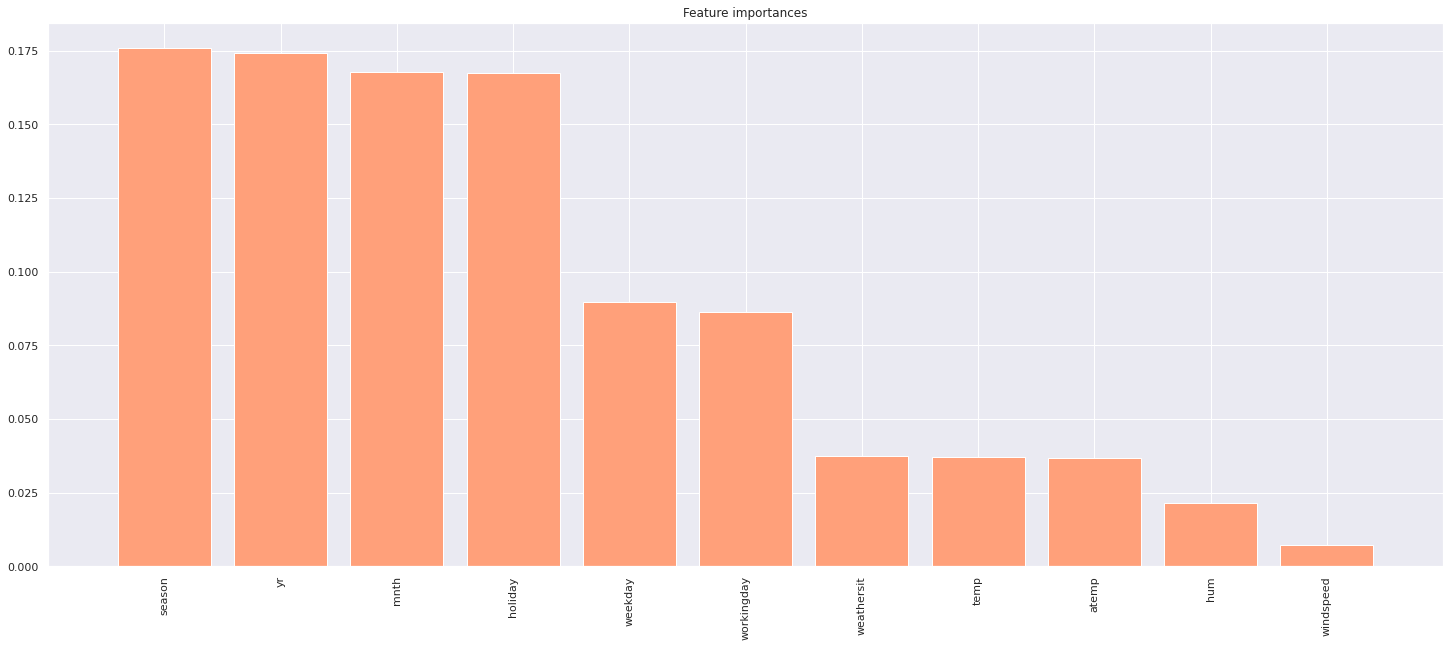

In [224]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Creating linear Model using Stats Model

## Linear model 1

### Checking the VIF

This will create a dataframe containing names of all the feature variables and their respective VIFs

In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,372.46
1,temp,362.33
3,hum,8.35
4,windspeed,3.97
0,yr,1.95


In [238]:
vif_chi = pd.DataFrame()
vif_chi['Features'] = df1.columns # chi squre test
vif_chi['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif_chi['VIF'] = round(vif_chi['VIF'], 2)
vif_chi = vif_chi.sort_values(by = "VIF", ascending = False)
vif_chi

,Features,VIF
4,weathersit,4.40
0,season,4.34
3,workingday,2.88
1,yr,1.85
2,holiday,1.07


In [229]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [230]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     313.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          5.37e-162
Time:                        18:03:38   Log-Likelihood:                -4867.1
No. Observations:                 584   AIC:                             9746.
Df Residuals:                     578   BIC:                             9772.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2759.9053    271.963     10.148      0.0

In [231]:
#Removing the const from the dataframe and creating a new dataframe as "X_train_new"

X_train_new = X_train_rfe.drop(["const",], axis = 1)

## Linear Model 2

Removing the "atemp" feature due to high VIF and high p-value

In [232]:
X_train_new = X_train_new.drop(["atemp",], axis = 1)

Checking VIF

In [233]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,7.89
1,temp,6.07
3,windspeed,3.88
0,yr,1.95


In [234]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     386.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.48e-162
Time:                        18:03:44   Log-Likelihood:                -4870.6
No. Observations:                 584   AIC:                             9751.
Df Residuals:                     579   BIC:                             9773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2842.1264    271.604     10.464      0.0

In [246]:
lr2.params

const        2842.126419
yr           2006.301112
temp         5072.170704
hum         -2056.128151
windspeed   -2175.741141
dtype: float64

In [ ]:
lr2.

## Linear Model 3

Removing the "windspeed" due to high VIF

In [235]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

Checking VIF

In [236]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,6.13
1,temp,6.02
0,yr,1.91


In [237]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     447.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.84e-150
Time:                        18:03:49   Log-Likelihood:                -4900.1
No. Observations:                 584   AIC:                             9808.
Df Residuals:                     580   BIC:                             9826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1516.2402    223.535      6.783      0.0

In [245]:
lr3.params

const    1516.240228
yr       2031.977590
temp     5300.808791
hum     -1379.694499
dtype: float64

## Linear Model 4

Removing the "hum" feature due to high VIF

In [239]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

Checking VIF

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.82
1,temp,1.82


In [243]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     640.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.37e-147
Time:                        18:10:04   Log-Likelihood:                -4910.2
No. Observations:                 584   AIC:                             9826.
Df Residuals:                     581   BIC:                             9839.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        670.4821    123.356      5.435      0.0

In [244]:
lr4.params

const     670.482057
yr       2083.128222
temp     5177.994687
dtype: float64

### Due to low Multicollinearity between the predictors and significant p-values, considering the linear model 2 as our final model.